# 00: Introduction and Setup

Welcome to **Understanding Transformers and GPT from Scratch**!

This notebook is your starting point for a deep dive into how modern Large Language Models work. By the end of this journey, you'll understand:

- How transformers process sequences
- What makes attention mechanisms powerful
- How GPT generates text
- How to build these components yourself

## What Makes This Different?

There are many transformer tutorials out there, but this one focuses on:

1. **Building intuition first** - Understanding the "why" before the "what"
2. **Implementing from scratch** - NumPy first, then PyTorch
3. **Visual learning** - Seeing what happens inside the model
4. **Hands-on practice** - Running and modifying real code
5. **Balanced math** - Equations explained intuitively, not just presented

## The Journey Ahead

### Phase 1: Foundations (Notebooks 00-01)
- **Now**: Setup and overview
- **Next**: RNNs, LSTMs, and their limitations

### Phase 2: The Attention Revolution (Notebooks 02-03)
- The attention mechanism
- Transformer architecture overview

### Phase 3: Building Blocks (Notebooks 04-08)
- Self-attention from scratch
- Multi-head attention
- Positional encoding
- Feed-forward networks
- Layer normalization and residuals

### Phase 4: Complete Transformer (Notebook 09)
- Assembling all components
- Training on a simple task

### Phase 5: GPT (Notebooks 10-12)
- GPT architecture
- Tokenization
- Training your own tiny language model

## Timeline: A Brief History

```
1997: LSTMs introduced (Hochreiter & Schmidhuber)
  |
2014: Attention mechanism (Bahdanau et al.)
  |
2017: 🚀 "Attention Is All You Need" (Vaswani et al.) - Transformers born!
  |
2018: GPT-1 (117M parameters)
  |
2019: GPT-2 (1.5B parameters)
  |
2020: GPT-3 (175B parameters)
  |
2022: ChatGPT (GPT-3.5)
  |
2023: GPT-4
  |
2024: Claude, Gemini, Llama 3, and many more...
```

The transformer architecture from 2017 is **still** the foundation of every modern LLM!

## Environment Setup

Let's verify that everything is installed correctly.

In [1]:
# Import essential libraries
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU (perfectly fine for learning!)")

Python version: 3.9.6 (default, Dec  2 2025, 07:27:58) 
[Clang 17.0.0 (clang-1700.6.3.2)]
NumPy version: 2.0.2
PyTorch version: 2.8.0
CUDA available: False
Running on CPU (perfectly fine for learning!)


In [2]:
# Add src directory to path so we can import our utilities
import os
sys.path.append(os.path.abspath('../src'))

# Import our custom utilities
from utils import set_style, print_tensor_info

# Set plotting style for all notebooks
set_style()

print("✓ Utils loaded successfully!")

✓ Utils loaded successfully!


## Quick Test: NumPy and PyTorch

Let's do a simple sanity check to make sure NumPy and PyTorch are working and producing equivalent results.

In [3]:
# Create a simple matrix multiplication in NumPy
np.random.seed(42)
A_np = np.random.randn(3, 4)
B_np = np.random.randn(4, 2)
C_np = A_np @ B_np

print("NumPy result:")
print(C_np)

# Same operation in PyTorch
torch.manual_seed(42)
A_torch = torch.randn(3, 4)
B_torch = torch.randn(4, 2)
C_torch = A_torch @ B_torch

print("\nPyTorch result:")
print(C_torch)

print("\n✓ Both libraries working correctly!")

NumPy result:
[[-1.68026624 -2.82005539]
 [-1.94911437 -0.00793418]
 [-0.15720889  1.1052854 ]]

PyTorch result:
tensor([[ 0.3800, -0.4268],
        [ 2.3457,  4.0023],
        [ 0.3356, -0.6944]])

✓ Both libraries working correctly!


## Visualization Test

Let's make sure matplotlib is working by creating a simple plot.

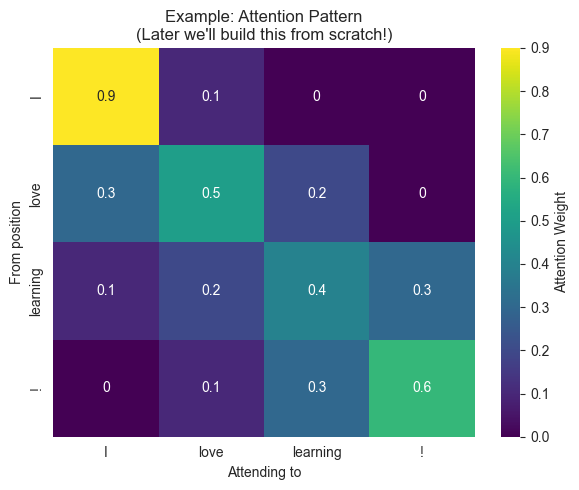

This is a preview of what attention weights look like!
Notice how each word 'attends' to other words in the sequence.


In [4]:
# Create a simple attention-like heatmap
sample_attention = np.array([
    [0.9, 0.1, 0.0, 0.0],
    [0.3, 0.5, 0.2, 0.0],
    [0.1, 0.2, 0.4, 0.3],
    [0.0, 0.1, 0.3, 0.6]
])

plt.figure(figsize=(6, 5))
sns.heatmap(sample_attention, 
            annot=True, 
            cmap='viridis',
            xticklabels=['I', 'love', 'learning', '!'],
            yticklabels=['I', 'love', 'learning', '!'],
            cbar_kws={'label': 'Attention Weight'})
plt.title('Example: Attention Pattern\n(Later we\'ll build this from scratch!)')
plt.xlabel('Attending to')
plt.ylabel('From position')
plt.tight_layout()
plt.show()

print("This is a preview of what attention weights look like!")
print("Notice how each word 'attends' to other words in the sequence.")

## What You'll Build

By the end of this series, you'll be able to:

### 1. Implement Attention from Scratch
```python
def scaled_dot_product_attention(Q, K, V):
    d_k = Q.shape[-1]
    scores = Q @ K.T / np.sqrt(d_k)
    attention_weights = softmax(scores)
    output = attention_weights @ V
    return output, attention_weights
```

### 2. Build a Complete Transformer
```python
class Transformer(nn.Module):
    def __init__(self, d_model, num_heads, num_layers):
        # You'll understand every line!
        ...
```

### 3. Train a Language Model
```python
# Your own GPT that generates text!
model = GPT(vocab_size, d_model, num_heads, num_layers)
generated_text = model.generate("Once upon a time", max_length=100)
```

### 4. Explain How It All Works
- Why does attention work?
- What makes transformers better than RNNs?
- How does GPT generate coherent text?
- What happens during training?

## Prerequisites

You should be comfortable with:

### Python Basics ✓
- Functions, classes, loops
- Basic NumPy operations

### Math Fundamentals ✓
- **Linear Algebra**: Matrix multiplication, vectors, dot products
  - We'll review as needed!
- **Calculus**: Basic derivatives (for understanding backprop)
  - High-level understanding is enough
- **Probability**: Basic probability and distributions
  - We'll explain softmax, distributions, etc.

### What You DON'T Need
- Prior deep learning experience
- Advanced mathematics
- Experience with other NLP methods

**We'll build everything from first principles!**

## Learning Philosophy

### 1. Understanding Over Memorization
We won't just show you formulas. We'll explain:
- **What** each component does
- **Why** it's designed that way
- **How** it fits into the bigger picture

### 2. Build to Learn
The best way to understand transformers is to build one.
- Implement core concepts from scratch (NumPy)
- Then see how professionals do it (PyTorch)
- Compare and understand the equivalence

### 3. Visualize Everything
Transformers involve complex matrix operations.
- We'll visualize attention patterns
- Plot embeddings in 2D
- Watch training dynamics
- Show actual tensor shapes

### 4. Hands-On Experimentation
Every notebook has exercises:
- Modify hyperparameters and observe effects
- Debug broken implementations
- Extend concepts in new directions

## Quick Primer: Key Concepts

Before diving in, here are the core ideas we'll explore:

### Embeddings
Converting words/tokens into dense vectors:
```
"cat" → [0.2, -0.5, 0.1, ...]  (e.g., 768 dimensions)
```

### Attention
Letting each word "look at" other words:
```
"The cat sat on the mat"
     ↓
"cat" pays attention to: "The" (10%), "sat" (60%), "mat" (30%)
```

### Self-Attention
Words attending to words in the same sequence:
```
Input: [word1, word2, word3]
        ↓
Each word looks at all words (including itself)
        ↓
Output: [context1, context2, context3]
```

### Transformer
Stack of attention + feed-forward layers:
```
Input → [Attention → FFN] × N layers → Output
```

### GPT (Decoder-only Transformer)
Generate text one token at a time:
```
"Once upon" → predict "a"
"Once upon a" → predict "time"
"Once upon a time" → predict "there"
...
```

We'll build each of these step by step!

## Helper Functions You'll Use

We've created utility functions in `src/utils.py` to help with visualization and debugging. Here are some you'll use frequently:

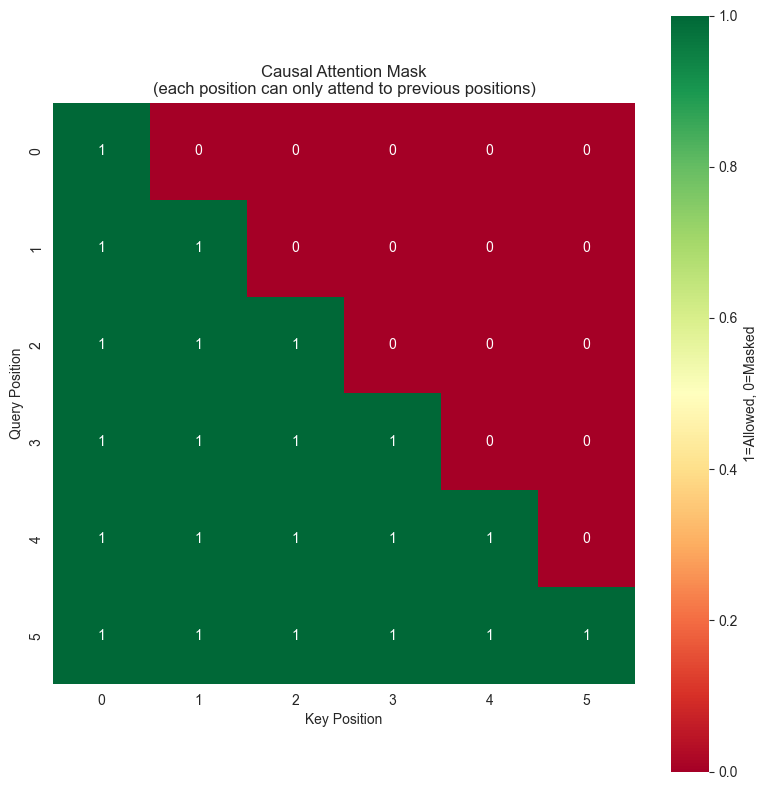


This shows how GPT can only look at previous tokens!
Green = allowed to attend, Red = masked out


In [5]:
from utils import (
    plot_attention_weights,      # Visualize attention patterns
    plot_multi_head_attention,   # Visualize multiple attention heads
    plot_embeddings_2d,          # Visualize embeddings in 2D
    plot_training_curves,        # Plot loss over time
    compare_outputs,             # Check NumPy vs PyTorch equivalence
    print_tensor_info,           # Debug tensor shapes and values
    visualize_causal_mask        # Show GPT-style masking
)

# Example: visualize a causal mask (used in GPT)
visualize_causal_mask(seq_len=6)

print("\nThis shows how GPT can only look at previous tokens!")
print("Green = allowed to attend, Red = masked out")

## Exercises

Before moving to the next notebook, make sure you:

1. **Can run all cells above** without errors
2. **Understand the learning path** - which notebooks cover what
3. **Feel excited** about the journey ahead!

### Optional Challenges

1. **Explore the timeline**: Research one of the papers mentioned (LSTM, Attention, Transformer, GPT)
2. **Play with the code**: Modify the attention heatmap visualization - change the values and see what happens
3. **Think ahead**: What questions do you have about transformers? Write them down and see if they're answered by the end!

## Next Steps

**You're all set!** 🎉

In the next notebook (`01_pre_transformer_era.ipynb`), we'll explore:
- Why sequence modeling is challenging
- How RNNs and LSTMs work
- What problems they couldn't solve
- Why we needed something better (transformers!)

Understanding the history helps you appreciate why transformers are such a breakthrough.

### Tips for Success
- **Take your time** - Understanding beats speed
- **Run the code** - Don't just read, execute and experiment
- **Do the exercises** - They reinforce key concepts
- **Ask questions** - If something is unclear, investigate!

**Happy learning!** 🚀